# TP1b - Génération de variables aléatoires (Deuxième partie)

## Estimation avancée - G3 SDIA

Dans ce TP, on continue de s'intéresser à la génération de variables aléatoires. Ce TP se concentre sur la méthode acceptation-rejet, l'estimation de Monte Carlo, et l'échantillonnage d'importance.

### Instructions

1. Renommer votre notebook sous la forme `tp1a_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 26 Novembre 2023, 23h59.

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import beta as beta_dist
import matplotlib.pyplot as plt

### Partie 1 - Acceptation-Rejet (*Rejection sampling*)

NB : Toujours comparer les distributions empiriques obtenues aux densités théoriques à l'aide d'histogrammes ou de *kernel density estimates*.

**Q1 - Loi Bêta**. On considère la loi Bêta, dont la densité sur $[0,1]$ est
$$f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1} \quad \alpha > 0, \quad \beta > 0.$$

On souhaite obtenir des échantillons de la loi Bêta dans le cas suivant : $\alpha = 2, \beta = 2$.
* Expiquer pourquoi il est difficile de mettre en place la méthode de la transformée inverse.
* Quelle loi très simple peut-on utiliser comme loi instrumentale ?
* Implémenter alors un algorithme acceptation-rejet pour obtenir $N = 10000$ échantillons.
* Comparer la proportion empirique d'échantillons acceptés avec sa valeur théorique.
* Quelle difficulté rencontre-t-on pour le cas $\alpha = 0.5, \beta = 0.5$ ?

In [44]:
import numpy as np

def beta_distribution(alpha, beta, size):
    samples = []
    accepted = 0
    total = 0
    
    while accepted < size:
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        total += 1
        
        if y <= beta_dist.pdf(x, alpha, beta):
            samples.append(x)
            accepted += 1
    
    acceptance_rate = accepted / total
    return samples, acceptance_rate



Acceptance rate: 0.8055421298533914


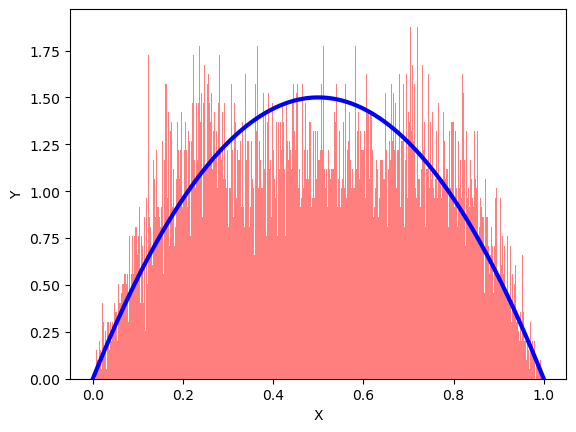

In [45]:
# Plotting sample distribution avec histogramme
alpha = 2
beta = 2
size = 10000
samples, acceptance_rate = beta_distribution(alpha, beta, size)
print("Acceptance rate:", acceptance_rate)

Hist_val,bins = np.histogram(samples,bins=500)
h = (bins.max()-bins.min())/500
plt.bar(bins[:-1],Hist_val/(size*h),width=h,color="red",alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
x = np.linspace(0, 1, 100)
plt.plot(x, beta_dist.pdf(x, alpha, beta), color="blue", lw=3)
plt.show()


Acceptance rate: 0.7957981855801369


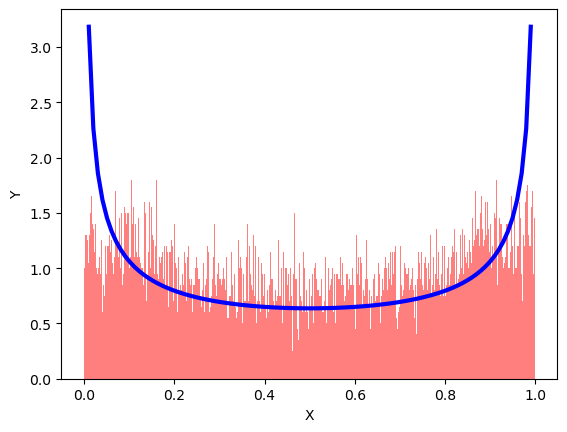

In [46]:
# Plotting sample distribution avec histogramme
alpha = 0.5
beta = 0.5
size = 10000
samples, acceptance_rate = beta_distribution(alpha, beta, size)
print("Acceptance rate:", acceptance_rate)

Hist_val,bins = np.histogram(samples,bins=500)
h = (bins.max()-bins.min())/500
plt.bar(bins[:-1],Hist_val/(size*h),width=h,color="red",alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
x = np.linspace(0, 1, 100)
plt.plot(x, beta_dist.pdf(x, alpha, beta), color="blue", lw=3)
plt.show()

---- Votre réponse ici ----

**Q2 - Loi Gamma**. On considère la loi Gamma, dont la densité sur $\mathbb{R}_+$ est définie par
$$f(x;\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} exp(-\beta x) x^{\alpha - 1}.$$

Nous avons déjà vu en TD que si $X_1, ..., X_n$ sont des v.a. indépendantes de loi Exponentielle de paramètre $\beta$, alors $Y = \sum_{i=1}^n X_i$ suit une loi Gamma de paramètres $(n,\beta)$. Ceci nous permet de simuler de la loi Gamma quand $\alpha$ est entier, mais pas lorsque $\alpha$ n'est pas entier.

Dans ce cas, on va utiliser une loi Gamma$(\lfloor \alpha \rfloor, \beta - 1)$ comme loi instrumentale :
* Obtenir la formule de la valeur optimale de la constante *M*, puis la calculer numériquement
* Implémenter un algorithme acceptation-rejet pour générer 10000 échantillons de la loi Gamma avec les paramètres $\alpha = 2.5$ et $\beta = 1.5$.

In [ ]:
#####
### YOUR CODE HERE
#####

---- Votre réponse ici ----

**Q3 - Gaussienne tronquée**. On souhaite maintenant obtenir des échantillons d'une loi gaussienne tronquée, i.e., une loi normale restreinte à un certain intervalle (en 1D), ou un certain pavé de l'espace (pour le cas multivarié).

On considère le cas d'une gaussienne multivariée $\mathcal{N}(0, I_d)$ que l'on tronque sur le pavé $[-1,2]^d$. On prendra comme loi instrumentale la loi $\mathcal{N}(0, I_d)$ (i.e., non tronquée)

* Justifier ce choix de loi instrumentale.
* Pour le cas univarié ($d=1$), calculer numériquement la probabilité d'acceptation de l'algorithme acceptation-rejet. On pourra utiliser $\texttt{scipy.stats.cdf}$.
* Que devient cette probabilité pour $d=10$ ? $d=100$ ? Conclure quant à la faiblesse fondamentale de l'algorithme acceptation-rejet.

In [ ]:
#####
### YOUR CODE HERE
#####

---- Votre réponse ici ----

## Partie 2 - Estimation de $\pi$ par Monte Carlo

On rappelle que $\pi$ est égal à la surface d'un cercle de rayon 1, i.e.
$$ \pi = \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) dx dy.$$

Ce qui peut se réécrire comme
$$ \pi = 4 \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) p(x) p(y) dx dy.$$
Où $p(x)$ et $p(y)$ sont les densités de la loi uniforme sur $[-1,1]$.

* En déduire l'esimtateur de Monte Carlo de $\pi$.
* Représenter l'évolution de la valeur de l'estimation par Monte Carlo de $\pi$ en fonction du nombre d'échantillons (aller jusqu'à 10000). Quel résultat mathématique fondamental est-on en train d'illustrer ?
* (Bonus) - Faire 100 simulations de l'estimation par Monte Carlo de $\pi$ avec $N = 1000$ échantillons, et vérifier le résultat de convergence en loi de l'estimateur MC donné par le TCL.

In [ ]:
#####
### YOUR CODE HERE
#####

---- Votre réponse ici ----

### Partie 3 - Échantillonnage d'importance (*Importance sampling*)

On cherche à estimer $\mathbb{P}(X > 3)$ pour $X \sim \mathcal{N}(0,1)$.

* Ré-écrire cette probabilité comme une intégrale et en déduire l'estimateur de Monte Carlo "standard"
* Simuler $100$ fois $N = 10000$ échantillons, et donner la moyenne et la variance empiriques de l'estimateur de Monte Carlo standard
* On souhaite maintenant implémenter un schéma d'échantillonnage d'importance en utilisant comme loi instrumentale $\mathcal{N}(4,1)$. Donner l'estimateur de Monte Carlo associé.
* De même, simuler $100$ fois $N = 10000$ échantillons, et donner la moyenne et la variance empiriques de de deuxième estimateur.
* Quantifier la réduction de variance. Pouvait-on s'attendre à ce résultat ?

In [ ]:
#####
### YOUR CODE HERE
#####

---- Votre réponse ici ----